In [11]:
from core import *
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = "../Data/Median_images"

In [3]:
Y_imgs_path = [path for path in glob.glob(DATA_PATH + "/*_HR.png")]
X_imgs_path = [path[:-7] + ".png" for path in Y_imgs_path]
Z_imgs_path = [path[:-6] + "SM.png" for path in Y_imgs_path]

In [4]:
X_imgs = np.array([skimage.img_as_float64(load_image(path, dtype=np.uint16)) for path in X_imgs_path])
Y_imgs = np.array([skimage.img_as_float64(load_image(path, dtype=np.uint16)) for path in Y_imgs_path])

In [5]:
X_imgs = X_imgs.reshape(X_imgs.shape[0],X_imgs.shape[1],X_imgs.shape[2],1)
Y_imgs = Y_imgs.reshape(Y_imgs.shape[0],Y_imgs.shape[1],Y_imgs.shape[2],1)

In [6]:
srcnn_model = load_srcnn_model(X_imgs.shape[1:])

In [13]:
score = []
count = 0
print("Calculating score")
for x,y,z_path in zip(X_imgs,Y_imgs,Z_imgs_path):
    x = x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
    z = load_image(z_path,dtype = np.bool)
    scene_id = z_path.split('/')[-1][:-7]
    pred = srcnn_model.predict(x,batch_size = 1)[0]
    pred = np.float64(pred)
    pred = pred.reshape(384,384)
    y = y.reshape(384,384)
    score.append(test_score_image(sr = pred,hr = y,sm = z,scene_id = scene_id))
    print('*', end='', flush='True')
print("\ncPSNR score : {}".format(np.mean(score)))    

Calculating score
**********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

In [2]:
generate_submissions("../Data/","../Result/SRCNN_images/",mode = "srcnn")

generate super resolved images: **************************************************************************************************************************************************************************************************************************************************************************************************
archiving: 
**************************************************************************************************************************************************************************************************************************************************************************************************
done.


In [7]:
srcnn_sr_images = srcnn_model.predict(X_imgs,batch_size = 1,verbose=1)

1160/1160 [==============================] - 926s 798ms/step


In [15]:
srcnn_sr_images = srcnn_sr_images.reshape(1160,384,384)
HR_images = Y_imgs.reshape(1160,384,384)

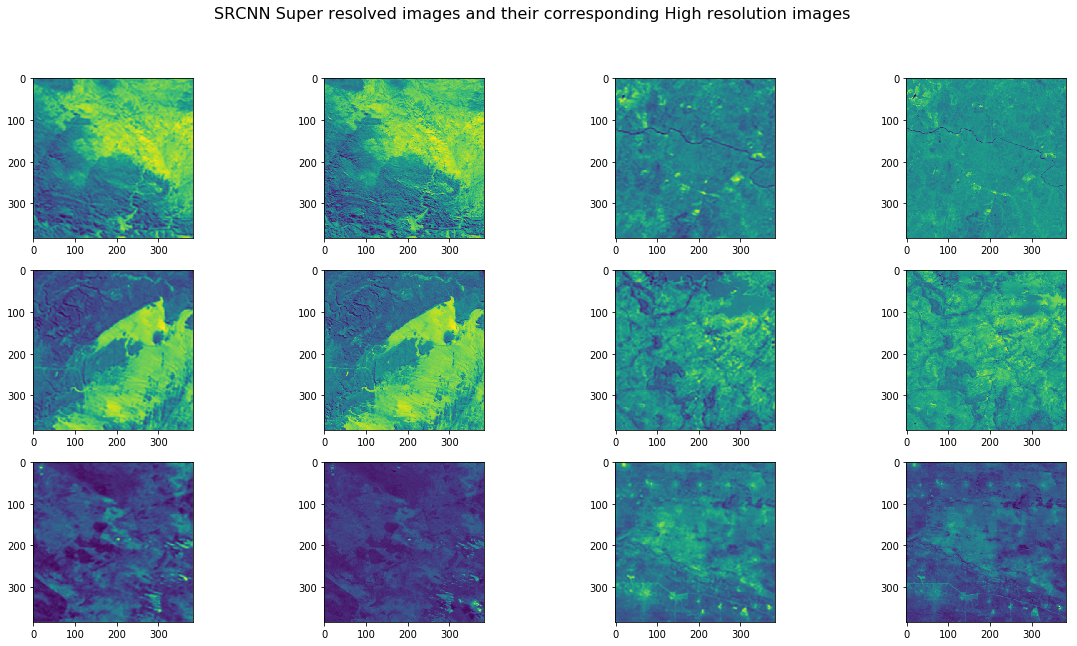

In [18]:
fig=plt.figure(figsize=(20,10))
fig.suptitle('SRCNN Super resolved images and their corresponding High resolution images', fontsize=16)
j = 1

for i in range(0,6,2):
    fig.add_subplot(3, 4, j)
    plt.imshow(srcnn_sr_images[i],cmap=None) 
    
    fig.add_subplot(3, 4, j+1)
    plt.imshow(HR_images[i],cmap=None)
    
    fig.add_subplot(3, 4, j +2)
    plt.imshow(srcnn_sr_images[i+1],cmap=None) 
    
    fig.add_subplot(3, 4, j+3)
    plt.imshow(HR_images[i+1],cmap=None)
    
    j += 4